# Azure GPT-image-1 
You can generate images with gpt-image-1. 

> ✨ ***Note*** <br>
> Please check the prerequisites and set up your environment before running the code below. 


## Prerequisites
Configure a Python virtual environment for 3.10 or later: 
 1. An Azure Subscription.
 1. An Azure AI project, see Create a project in Azure AI Foundry portal.
 1. Open the Command Palette (Ctrl+Shift+P).
 1. Search for Python: Create Environment.
 1. select Venv / Conda and choose where to create the new environment.
 1. Select the Python interpreter version. Create with version 3.10 or later.

For a dependency installation, run the code below to install the packages required to run it. 

```bash
# Create a virtual environment
python -m venv venv

# Activate the virtual environment
# On Windows
venv\Scripts\activate

# On macOS/Linux
source venv/bin/activate

pip install -r requirements.txt
```

## Set up your environment
Git clone the repository to your local machine. 

```bash
git clone https://github.com/hyogrin/Azure_OpenAI_samples.git
```

Create an .env file based on the .env-sample file. Copy the new .env file to the folder containing your notebook and update the variables.

In [2]:
import os
from openai import AzureOpenAI

from dotenv import load_dotenv
load_dotenv(override=True)


aoai_api_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
aoai_api_key = os.getenv("AZURE_OPENAI_API_KEY")
aoai_api_version = os.getenv("AZURE_OPENAI_API_VERSION")
aoai_deployment_name = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")

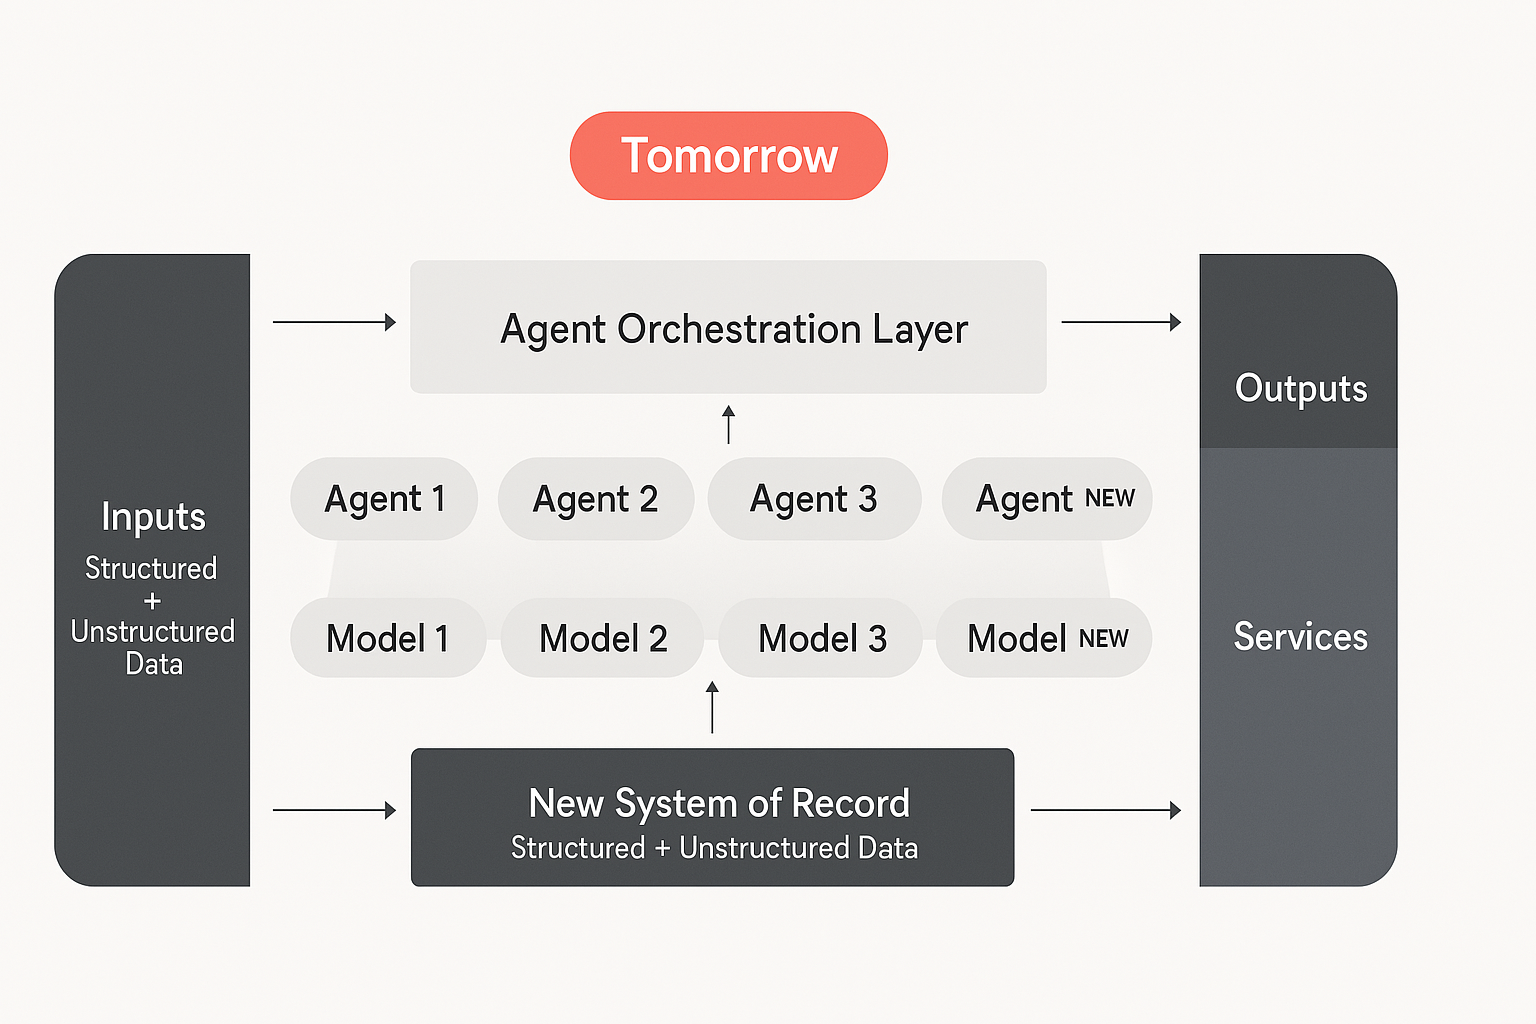

In [3]:
 
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display

#edits_endpont = "https://gbb-ea-aoai-westus3-shared.openai.azure.com/openai/deployments/gpt-image-1/images/edits?api-version=2025-04-01-preview"
 
# Set your Azure OpenAI credentials
client = AzureOpenAI(
    api_key=aoai_api_key,
    api_version=aoai_api_version,  # or latest supported version
    azure_endpoint=aoai_api_endpoint
)
 
# Define your edit prompt
edit_prompt = (
    "update the image into a corporate profession infographic style "
    "Remove 'Agent evolution' title. "
)
 
result = client.images.edit(
    model="gpt-image-1",
    image=[
        open("./images/agent_evolution.png", "rb")
    ],
    prompt=edit_prompt
)
 
image_base64 = result.data[0].b64_json
image_bytes = base64.b64decode(image_base64)
image = Image.open(BytesIO(image_bytes))
 
# Display the image in Jupyter Notebook
display(image)